# Time Series Regression Modelling

Time series regression modelling with the goal to forecast the number of bikes per hour (`bike_tot`) as accurate as possible.

In [23]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

## 1. Load the data
First we load `df_agg_hourly_2022.csv` from `results` where we want to build our model with. 

In [61]:
# Load the data as a pandas df
df = pd.read_csv('../../results/df_agg_hourly_2022.csv')

# Add df_agg_hourly_2023.csv to the df
df2 = pd.read_csv('../../results/df_agg_hourly_2023.csv')
df = pd.concat([df, df2])
# Delete df2
del df2

# Filter only rows where Standort is 1037
df = df[df['Standort'] == 1037]

# Drop the ped_tot and AnzBestWir columns
df.drop(['ped_tot', 'AnzBestWir'], axis=1, inplace=True)

# Convert the Datetime column to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert the Time column to time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Create a new column for weekday as a character with the name of the day
df['Weekday'] = df['Date'].dt.day_name()

# Create a new column for Month with the name of the month
df['Month'] = df['Date'].dt.month_name()

# Show some information about the data
df.info()

# Show the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 17517 entries, 26277 to 21379
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Standort       17517 non-null  int64         
 1   Date           17517 non-null  datetime64[ns]
 2   Time           17517 non-null  object        
 3   Datetime       17517 non-null  datetime64[ns]
 4   Hr [%Hr]       17517 non-null  float64       
 5   RainDur [min]  17517 non-null  float64       
 6   StrGlo [W/m2]  17517 non-null  float64       
 7   T [°C]         17517 non-null  float64       
 8   WD [°]         17517 non-null  float64       
 9   WVs [m/s]      17517 non-null  float64       
 10  WVv [m/s]      17517 non-null  float64       
 11  p [hPa]        17517 non-null  float64       
 12  Year           17517 non-null  float64       
 13  bezeichnung    17517 non-null  object        
 14  bike_tot       17517 non-null  float64       
 15  Weekday        17517

,Standort,Date,Time,Datetime,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],Year,bezeichnung,bike_tot,Weekday,Month
26277,1037,2022-01-01,00:00:00,2022-01-01 00:00:00,85.123333,0.0,0.02,6.590000,182.530000,0.603333,0.390000,978.233333,2022.0,Hardbrücke Süd (Seite HB),42.0,Saturday,January
26278,1037,2022-01-01,01:00:00,2022-01-01 01:00:00,84.470000,0.0,0.02,6.313333,167.976667,0.503333,0.376667,978.106667,2022.0,Hardbrücke Süd (Seite HB),81.0,Saturday,January
26279,1037,2022-01-01,02:00:00,2022-01-01 02:00:00,87.533333,0.0,0.03,6.023333,243.186667,0.553333,0.286667,978.163333,2022.0,Hardbrücke Süd (Seite HB),57.0,Saturday,January
26280,1037,2022-01-01,03:00:00,2022-01-01 03:00:00,88.470000,0.0,0.02,5.553333,171.720000,0.443333,0.210000,978.450000,2022.0,Hardbrücke Süd (Seite HB),51.0,Saturday,January
26281,1037,2022-01-01,04:00:00,2022-01-01 04:00:00,89.313333,0.0,0.02,5.083333,214.436667,0.356667,0.230000,978.446667,2022.0,Hardbrücke Süd (Seite HB),39.0,Saturday,January


Create an AR, an MA model and fit them to the transformed (shifted) time series, use the proper parameter. Plot the transformed time series with the fitted values of the each model. Compare the results and estimate *through model analysis* what is the best. 

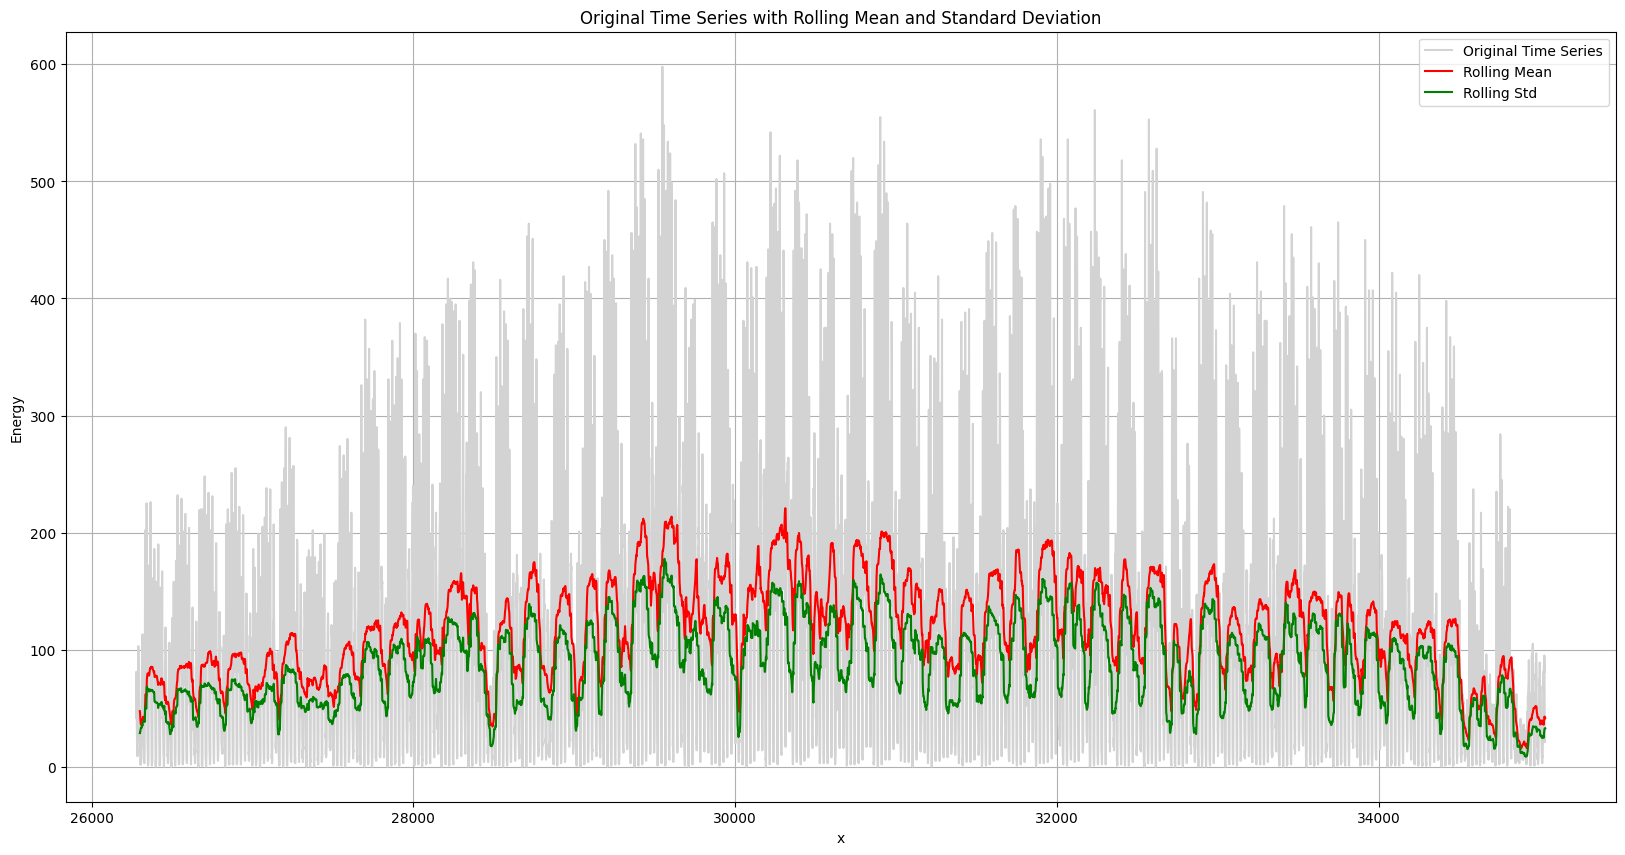

Results of Augmented Dickey-Fuller Test:
Test Statistic                -8.637618e+00
p-value                        5.535803e-14
#Lags Used                     3.700000e+01
Number of Observations Used    8.721000e+03
Critical Value (1%)           -3.431100e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


In [62]:
# Filter only rows where Date is before 2023-01-01
df2022 = df[df['Date'] < '2023-01-01']

# Plot the original time series
plt.figure(figsize=(20, 10))
plt.plot(df2022['bike_tot'], color = 'lightgrey', label = 'Original Time Series')

# Calculate the rolling statistics
rolling_mean = df2022['bike_tot'].rolling(window=24).mean()
rolling_std = df2022['bike_tot'].rolling(window=24).std()

# Plot the rolling statistics
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Energy')
plt.title('Original Time Series with Rolling Mean and Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

# Perform the Dickey-Fuller test
print('Results of Augmented Dickey-Fuller Test:')
adf_test = adfuller(df2022['bike_tot'], autolag='AIC')
adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value
print(adf_output)

We get a p-vale $\leq 0.05$ thus we can reject $H_0$. The time series is stationary.

<Figure size 1000x600 with 0 Axes>

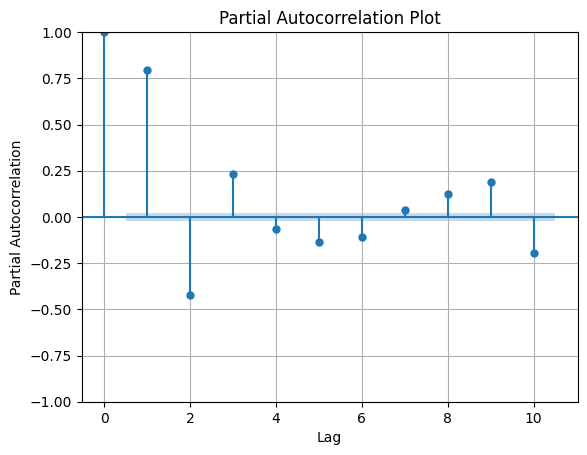

In [63]:
# Plot the partial autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf
# Plot partial autocorrelation plot
plt.figure(figsize=(10, 6))
plot_pacf(df2022['bike_tot'], lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.grid(True)
plt.show()

(8752, 34) (8758, 34) (8752,) (8758,)
Mean Squared Error: 2472.5478279082736


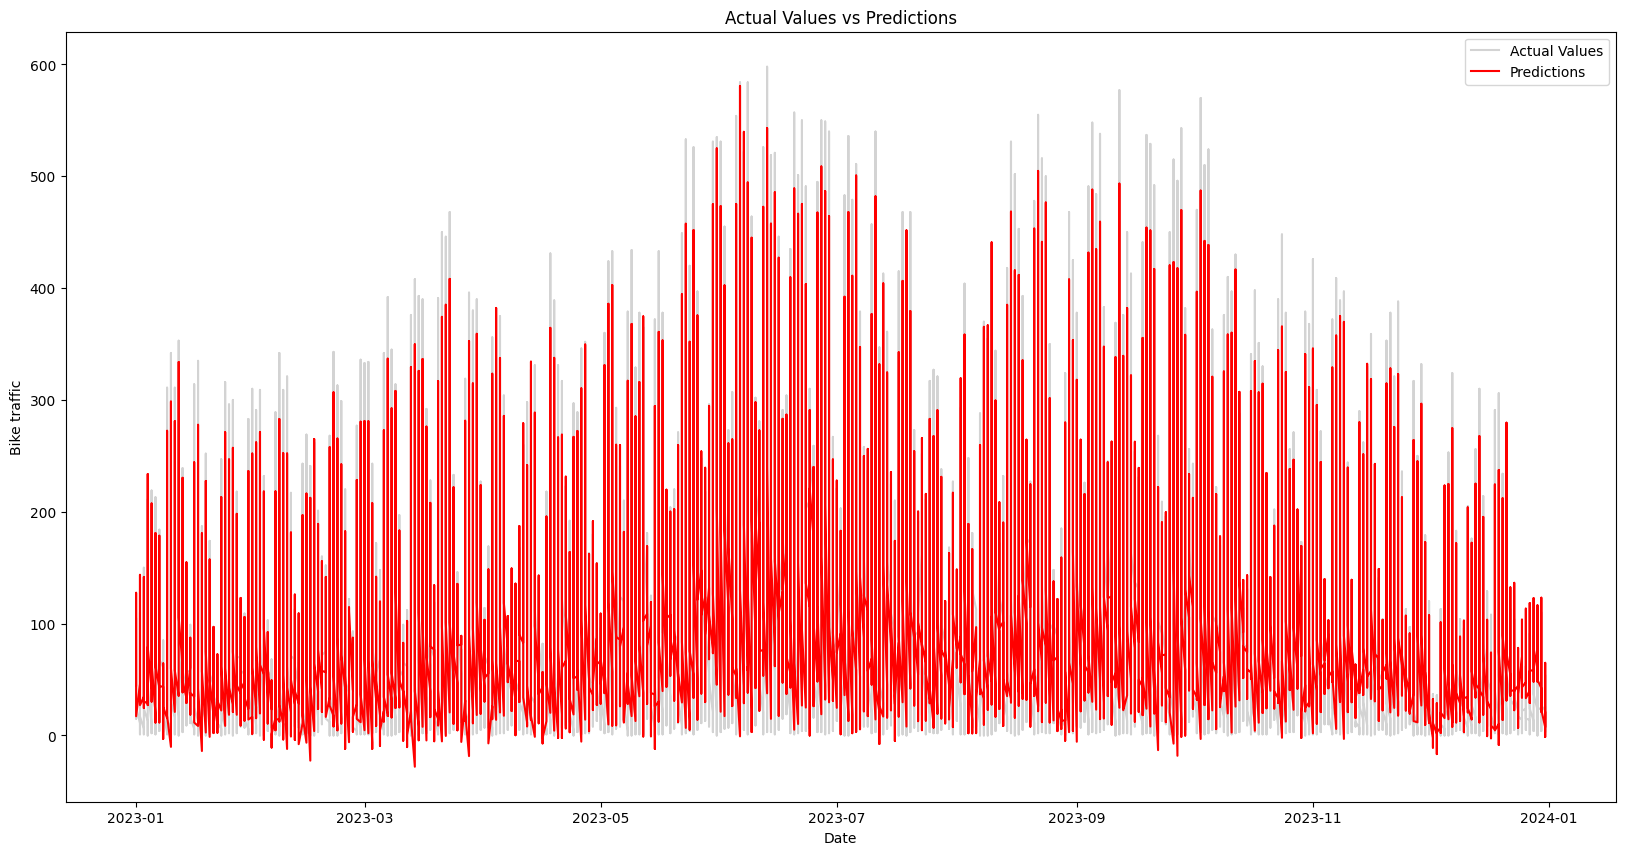

In [77]:
# Fit a simple regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a copy of the dataframe
df_copy = df.copy()

# Create a new column for the lagged values
df_copy['lag1'] = df_copy['bike_tot'].shift(1)
df_copy['lag2'] = df_copy['bike_tot'].shift(2)
df_copy['lag3'] = df_copy['bike_tot'].shift(3)
df_copy['lag4'] = df_copy['bike_tot'].shift(4)
df_copy['lag5'] = df_copy['bike_tot'].shift(5)
df_copy['lag6'] = df_copy['bike_tot'].shift(6)
df_copy['lag7'] = df_copy['bike_tot'].shift(7)

# Drop the rows with missing values
df_copy.dropna(inplace=True)

# Split the data into X and y where X is the lagged values plus weekday, month, time and y is the target variable
X = df_copy[['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'Weekday', 'Month', 'Date',
             'Hr [%Hr]', 'RainDur [min]', 'StrGlo [W/m2]', 'T [°C]', 'WD [°]', 'WVs [m/s]', 'WVv [m/s]', 'p [hPa]']]

# Convert weekday and month to dummie variables
X = pd.get_dummies(X, columns=['Weekday', 'Month'])

# Split the data into training set where the date is before 2023-01-01 and test set where the date is after 2023-01-01
X_train = X[X['Date'] < '2023-01-01'].drop('Date', axis=1)
y_train = df_copy[df_copy['Date'] < '2023-01-01']['bike_tot']

X_test = X[X['Date'] >= '2023-01-01'].drop('Date', axis=1)
y_test = df_copy[df_copy['Date'] >= '2023-01-01']['bike_tot']

# Check the shape of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Fit the model without the 'Datetime' column
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

test_Dates = df_copy[df_copy['Date'] >= '2023-01-01']['Date']
# Plot the predictions and the actual values as a time series
plt.figure(figsize=(20, 10))
plt.plot(test_Dates, y_test, color = 'lightgrey', label = 'Actual Values')
plt.plot(test_Dates, y_pred, color = 'red', label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Bike traffic')
plt.title('Actual Values vs Predictions')
plt.legend()


In [78]:
# Show the model equation
print('Model Equation:')

# Show the intercept
intercept = model.intercept_
print(f'Intercept: {intercept}')

# Show the coefficients
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients, '\n')

# Show the R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

Model Equation:
Intercept: 44.79176251487229
                   Coefficient
lag1                  1.084995
lag2                 -0.634323
lag3                  0.177991
lag4                 -0.004203
lag5                 -0.005744
lag6                 -0.138206
lag7                 -0.048616
Hr [%Hr]             -0.979905
RainDur [min]        -0.076871
StrGlo [W/m2]        -0.022302
T [°C]                1.631425
WD [°]               -0.043938
WVs [m/s]             5.437290
WVv [m/s]            -5.943345
p [hPa]               0.077471
Weekday_Friday        4.293739
Weekday_Monday       -3.082811
Weekday_Saturday     -9.843394
Weekday_Sunday      -21.422361
Weekday_Thursday     10.661778
Weekday_Tuesday       9.097374
Weekday_Wednesday    10.295675
Month_April          -4.722621
Month_August         -8.754538
Month_December       -0.845645
Month_February       -7.840839
Month_January        -0.241142
Month_July          -13.928416
Month_June            4.774059
Month_March          -7.5

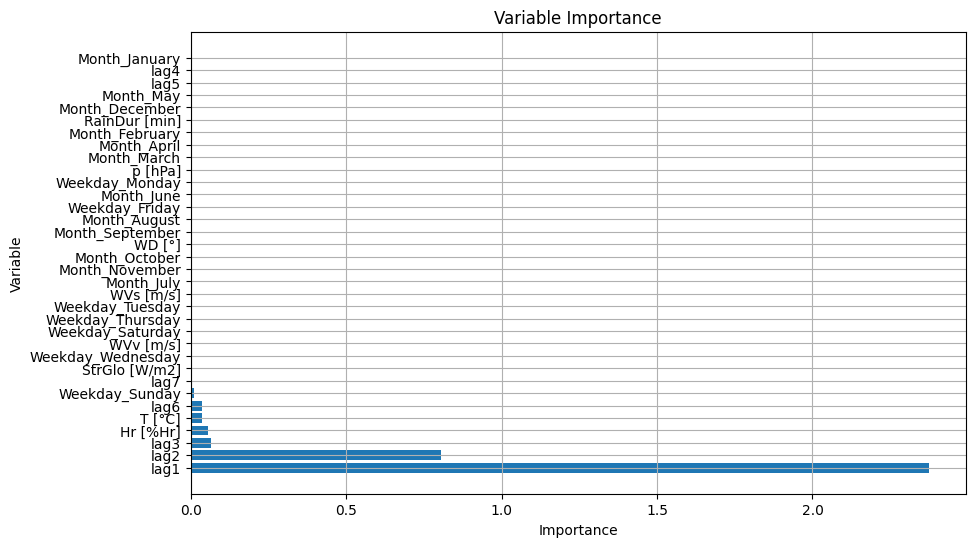

In [79]:
# Next show variable importance for the linear regression model
from sklearn.inspection import permutation_importance
imp = permutation_importance(model, X_test, y_test)

# Create a dataframe with the importance values
importance = pd.DataFrame(imp.importances_mean, X_test.columns, columns=['Importance'])

# Sort the values
importance = importance.sort_values(by='Importance', ascending=False)

# Plot the importance values
plt.figure(figsize=(10, 6))
plt.barh(importance.index, importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance')
plt.grid(True)

## Lasso Regression Model
Next we create a lasso regression model

/home/philipp/miniconda3/envs/esc403/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.033e+05, tolerance: 6.876e+03
  model = cd_fast.enet_coordinate_descent(
/home/philipp/miniconda3/envs/esc403/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.113e+04, tolerance: 6.876e+03
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 2472.1590116080374


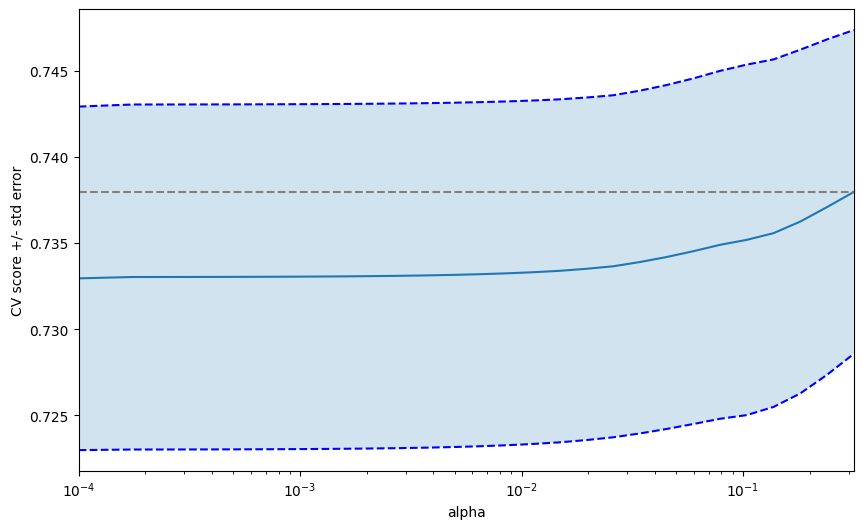

In [82]:
# Fit a lasso regression model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a lasso model
lasso = Lasso(random_state=0, max_iter=10000)

# Create a dictionary with the hyperparameters
alphas = np.logspace(-4, -0.5, 30)
param_grid = {'alpha': alphas}

# Create a grid search object, setting the cv parameter to 5 and number of iterations to 100
n_folds = 5
grid_search = GridSearchCV(lasso, param_grid, cv = n_folds)

# Fit the grid search object
grid_search.fit(X_train, y_train)

# Calculate scores
scores = grid_search.cv_results_["mean_test_score"]
scores_std = grid_search.cv_results_["std_test_score"]

# Plot error lines showing +/- std. errors of the scores
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

KeyError: 'Date'

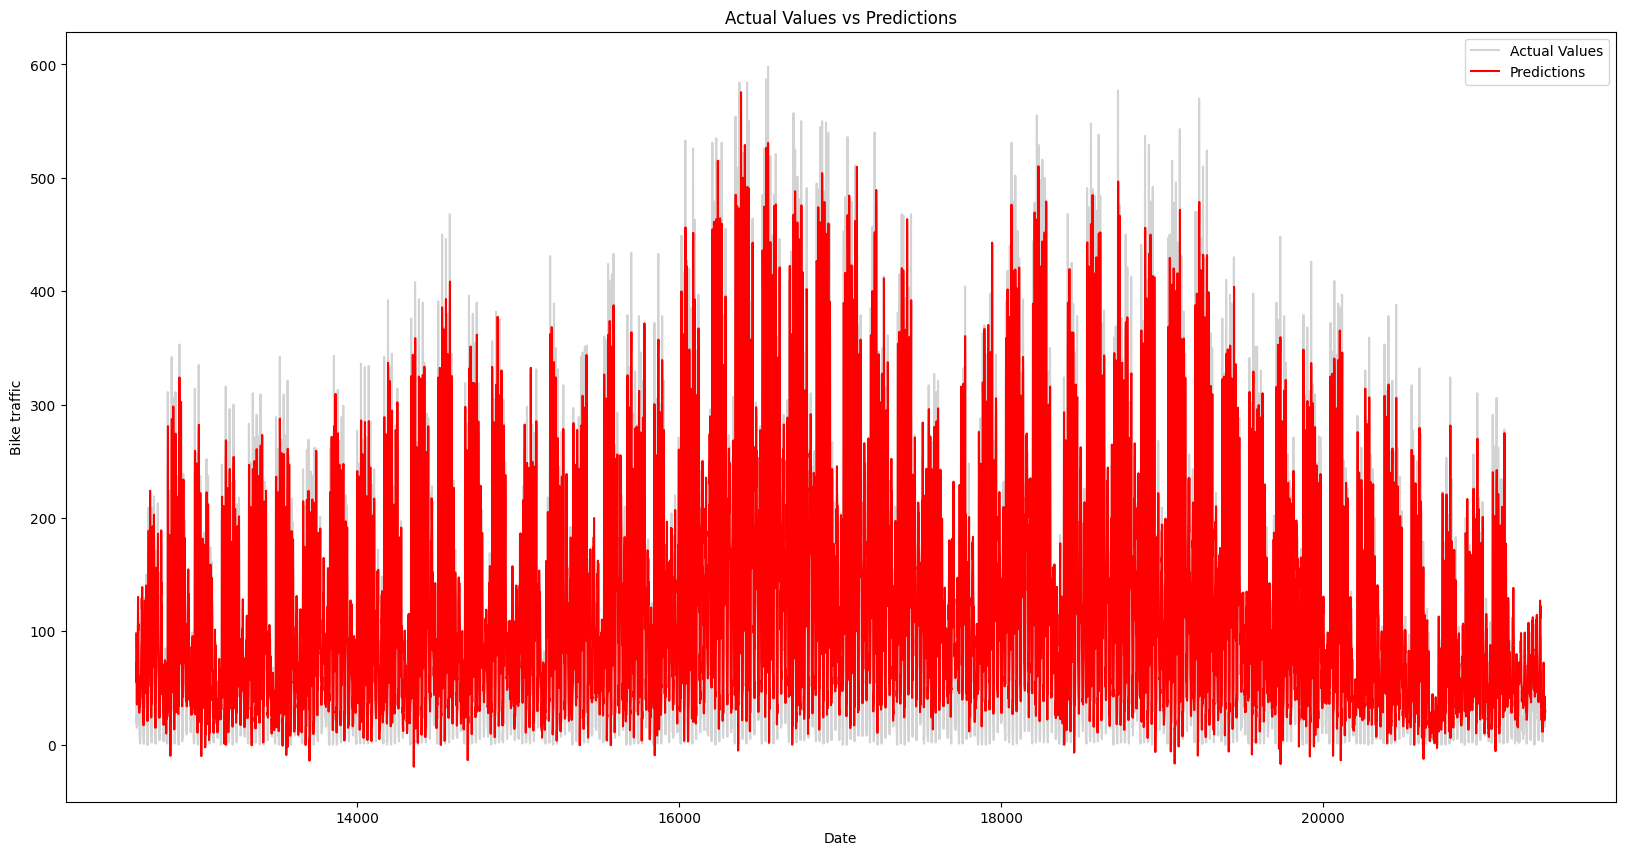

<Figure size 2000x1000 with 0 Axes>

In [70]:
# Make predictions
y_pred = grid_search.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the predictions and the actual values as a time series
plt.figure(figsize=(20, 10))
plt.plot(y_test.index, y_test, color = 'lightgrey', label = 'Actual Values')
plt.plot(y_test.index, y_pred, color = 'red', label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Bike traffic')
plt.title('Actual Values vs Predictions')
plt.legend()

# Plot the predictions and the actual value as a time series for the first 100 values
plt.figure(figsize=(20, 10))
plt.plot(X_test['Date'][:100], y_test[:100], color = 'lightgrey', label = 'Actual Values')
plt.plot(X_test['Date'][:100], y_pred[:100], color = 'red', label = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Bike traffic')
plt.title('Actual Values vs Predictions')
plt.legend()

Model Equation:
Intercept: 132.60127934804808
               Coefficient
lag1              1.126638
lag2             -0.646279
lag3              0.192101
lag4              0.004073
lag5              0.004451
lag6             -0.145193
lag7             -0.017842
Hr [%Hr]         -0.619773
RainDur [min]    -0.121424
StrGlo [W/m2]    -0.010795
T [°C]            1.497949
WD [°]           -0.034324
WVs [m/s]        -0.000000
WVv [m/s]        -0.000000
p [hPa]          -0.045694
Weekday_0        -0.000000
Weekday_1         0.000000
Weekday_2         0.000000
Weekday_3         0.000000
Weekday_4         0.000000
Weekday_5        -4.386329
Weekday_6       -13.949393
Month_1           0.000000
Month_2          -0.000000
Month_3          -0.000000
Month_4          -0.000000
Month_5           0.000000
Month_6           0.000000
Month_7          -0.000000
Month_8          -0.000000
Month_9           0.000000
Month_10          0.000000
Month_11          0.000000
Month_12         -0.000000 

R^2: 0.

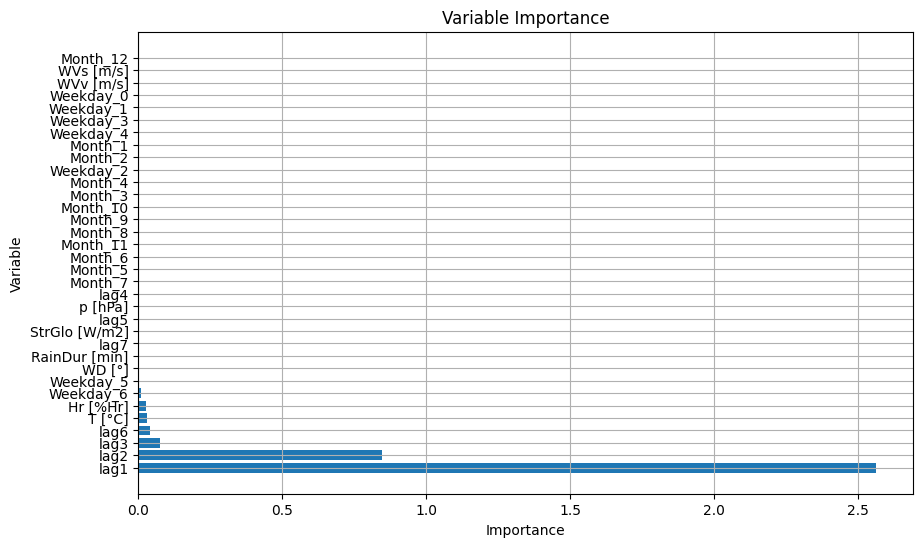

In [59]:
# Show the model equation
print('Model Equation:')

# Show the intercept
intercept = grid_search.best_estimator_.intercept_
print(f'Intercept: {intercept}')

# Show the coefficients
coefficients = pd.DataFrame(grid_search.best_estimator_.coef_, X_train.columns, columns=['Coefficient'])
print(coefficients, '\n')

# Show the R^2 score
r2 = grid_search.best_score_
print(f'R^2: {r2}')

# Next show variable importance for the lasso regression model
imp = permutation_importance(grid_search, X_test, y_test)

# Create a dataframe with the importance values
importance = pd.DataFrame(imp.importances_mean, X_test.columns, columns=['Importance'])

# Sort the values
importance = importance.sort_values(by='Importance', ascending=False)

# Plot the importance values
plt.figure(figsize=(10, 6))
plt.barh(importance.index, importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Variable Importance')
plt.grid(True)